In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Langkah 1: Persiapkan lingkungan di Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Langkah 2: Muat data gambar menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Emotion',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

Found 264 images belonging to 3 classes.


In [ ]:
# Langkah 3: Bangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer untuk mengurangi overfitting
    Dense(3, activation='softmax')  # 3 kelas: 'angry', 'sad', 'happy'
])

In [ ]:
# Langkah 4: Latih Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=20)  # Meningkatkan jumlah epoch menjadi 20


Epoch 1/20
8/8 [==============================] - 5s 275ms/step - loss: 0.9445 - accuracy: 0.5431
Epoch 2/20
8/8 [==============================] - 2s 232ms/step - loss: 0.8653 - accuracy: 0.6078
Epoch 3/20
8/8 [==============================] - 2s 241ms/step - loss: 0.8498 - accuracy: 0.5905
Epoch 4/20
8/8 [==============================] - 2s 224ms/step - loss: 0.8395 - accuracy: 0.6055
Epoch 5/20
8/8 [==============================] - 3s 311ms/step - loss: 0.8307 - accuracy: 0.6164
Epoch 6/20
8/8 [==============================] - 2s 226ms/step - loss: 0.8055 - accuracy: 0.6484
Epoch 7/20
8/8 [==============================] - 2s 212ms/step - loss: 0.7691 - accuracy: 0.6853
Epoch 8/20
8/8 [==============================] - 2s 202ms/step - loss: 0.8213 - accuracy: 0.5991
Epoch 9/20
8/8 [==============================] - 2s 244ms/step - loss: 0.7688 - accuracy: 0.6207
Epoch 10/20
8/8 [==============================] - 3s 313ms/step - loss: 0.8521 - accuracy: 0.6164
Epoch 11/20
8/8 [==

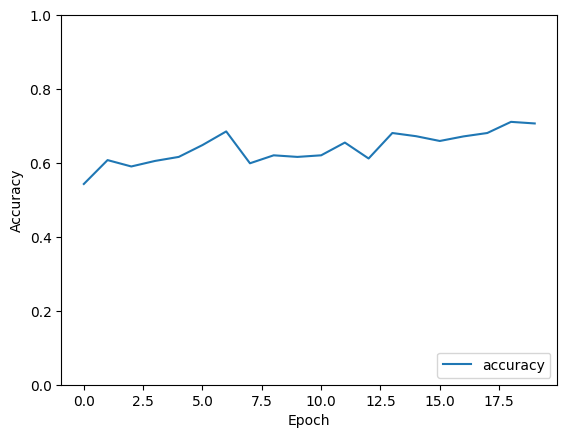

In [ ]:
# Langkah 5: Evaluasi model
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Langkah 1: Mendapatkan prediksi model terhadap data validasi
# Anda perlu menyiapkan generator data untuk data validasi
# Misalnya, jika Anda memiliki generator bernama validation_generator untuk data validasi
# Anda dapat menggunakan model.predict() untuk mendapatkan prediksi
# Misalnya: y_pred = model.predict(validation_generator)

# Contoh (asumsikan y_true adalah label validasi yang sebenarnya):
y_true = np.array([0, 1, 1, 0, 1])  # Label sebenarnya
y_pred = np.array([0, 1, 0, 0, 1])  # Prediksi dari model

# Langkah 2: Menghitung F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')

print("F1-Score:", f1)


F1-Score: 0.8


In [ ]:
# Setelah pelatihan model, tambahkan kode berikut untuk menyimpan model ke dalam file .h5
model.save('/content/drive/MyDrive/emotion_model.h5')  # Ganti dengan path tempat Anda ingin menyimpan model


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/emotion_model.h5')  # Ganti dengan path tempat Anda menyimpan model


Upload an image file:


Saving 1HEoLBLidT2u4mhJ0oiDgig.png to 1HEoLBLidT2u4mhJ0oiDgig.png


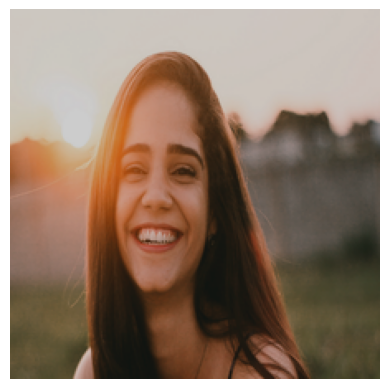

1/1 [==============================] - 0s 82ms/step
Hasil Prediksi: Happy


In [ ]:
from google.colab import files
import os

# Path to the directory containing test images
test_image_dir = '/content/drive/MyDrive/Emotion'  # Ganti dengan path folder test Anda

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/emotion_model.h5')  # Ganti dengan path model Anda

# Function to predict emotion from an image file
def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    prediction = model.predict(img_array)
    emotion_labels = ['Angry', 'Happy', 'Sad']
    predicted_class = np.argmax(prediction)
    return emotion_labels[predicted_class]

# Function to display the image and its predicted emotion
def display_image_with_prediction(image_path):
    img = image.load_img(image_path, target_size=(224, 224), interpolation='lanczos')  # Gunakan interpolasi yang lebih baik
    img = image.img_to_array(img)

    # Normalisasi kontras dan kejelasan
    img = img * 0.8  # Misalnya, tingkatkan kontras dengan mengalikan dengan 0.8
    img = np.clip(img, 0, 255)  # Pastikan nilai piksel tidak melebihi 255

    plt.imshow(img.astype(np.uint8))  # Konversi kembali ke tipe data integer untuk ditampilkan
    plt.axis('off')
    plt.show()
    predicted_emotion = predict_emotion(image_path)
    print('Hasil Prediksi:', predicted_emotion)

# Function to allow user to upload image file
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

# Example usage:
print("Upload an image file:")
uploaded_image_path = upload_image()
if uploaded_image_path:
    display_image_with_prediction(os.path.join(os.getcwd(), uploaded_image_path))
else:
    print("No image uploaded.")
